# Statistics for wine volume regression model

Mean absolute error (MAE) for laboratory images of glasses and cups model.

In [ ]:
import os
import json

import numpy as np
import matplotlib.pylab as plt
from tensorflow.keras.models import load_model

from imgclas import paths, utils, data_utils
from imgclas.data_utils import load_data_splits, k_crop_data_sequence
from imgclas.test_utils import predict
from imgclas.visualization.saliency import GradientSaliency
from imgclas.visualization.guided_backprop import GuidedBackprop
from imgclas.visualization.integrated_gradients import IntegratedGradients
from imgclas.visualization.visual_backprop import VisualBackprop

# User parameters to set
TIMESTAMP = '2023-06-22_171209'                       # timestamp of the model
MODEL_NAME = 'final_model.h5'                           # model to use to make the prediction
TOP_K = 2                                               # number of top classes predictions to save

# Set the timestamp
paths.timestamp = TIMESTAMP

# Load training configuration
conf_path = os.path.join(paths.get_conf_dir(), 'conf.json')
with open(conf_path) as f:
    conf = json.load(f)
    
filepath = os.path.join(paths.get_checkpoints_dir(), MODEL_NAME)
obj=utils.get_custom_objects()

# Load the model
model = load_model(filepath, custom_objects=obj)

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [83]:
import os
import json

import numpy as np
import matplotlib.pylab as plt
from tensorflow.keras.models import load_model

from imgclas import paths, utils, data_utils
from imgclas.data_utils import load_data_splits, k_crop_data_sequence
from imgclas.test_utils import predict
from imgclas.visualization.saliency import GradientSaliency
from imgclas.visualization.guided_backprop import GuidedBackprop
from imgclas.visualization.integrated_gradients import IntegratedGradients
from imgclas.visualization.visual_backprop import VisualBackprop
# User parameters to set
TIMESTAMP = '2023-06-22_171209'                       # timestamp of the model
MODEL_NAME = 'final_model.h5'                           # model to use to make the prediction
TOP_K = 2                                               # number of top classes predictions to save

# Set the timestamp
paths.timestamp = TIMESTAMP


In [299]:
import pandas as pd
# Load back the predictions
SPLIT_NAME='test'
pred_path = os.path.join(paths.get_predictions_dir(), '{}+{}.json'.format(MODEL_NAME, SPLIT_NAME, TOP_K))
with open(pred_path) as f:
    pred_dict = json.load(f)

df_pred=pd.DataFrame(pred_dict)
df_pred['abs_error']=abs(df_pred.pred_value-df_pred.true_value)

In [300]:
def get_bin(true_values):
    
    grams = [100, 125, 150, 175, 200, 225, 250, 275, 300, 325, 350, 375]
    bins = [87.5, 112.5, 137.5, 162.5, 187.5, 212.5, 237.5, 262.5, 287.5, 312.5, 337.5, 362.5, 387.5]
    
    result = list()
    for e in true_values:
        l = len(bins)
        index = 0
        for i in range(l):
            try:
                if bins[i] < float(e) and bins[i+1] > float(e):
                    index = i
                    result.append(grams[index])
                    break
            except:
                print(e)
    
    return result

In [301]:
["location", "fruta", "variedad", "tamaño", "plato", "luz", "plano", "angulo"]
# extract values of angle, plane and background in all images
df_pred['location'] = df_pred.apply(lambda row: row.filenames.split('_')[0].split('/')[-1], axis=1)
df_pred['variety'] = df_pred.apply(lambda row: row.filenames.split('_')[2], axis=1)
df_pred['size'] = df_pred.apply(lambda row: row.filenames.split('_')[3].replace(',','.'), axis=1)
df_pred['plate'] = df_pred.apply(lambda row: row.filenames.split('_')[4], axis=1)
df_pred['light'] = df_pred.apply(lambda row: row.filenames.split('_')[5], axis=1)
df_pred['shot'] = df_pred.apply(lambda row: row.filenames.split('_')[6], axis=1)
df_pred['angle'] = df_pred.apply(lambda row: row.filenames.split('_')[7].split('.')[0], axis=1)
df_pred.head(5)

,filenames,pred_value,true_value,abs_error,location,variety,size,plate,light,shot,angle
0,"/srv/nextcloud/MANZANA/Granny Smith/209,01/Mad...",214.921295,209.009995,5.911301,Mad,Granny Smith,209.01,Spm,ext,al,sup
1,/srv/nextcloud/MANZANA/Fuji/280.70/Rio_M_Fuji_...,237.632385,280.700012,43.067627,Rio,Fuji,280.70,Spb,ext,al,ver
2,/srv/nextcloud/MANZANA/Fuji/141.14/Rio_M_Fuji_...,154.556213,141.139999,13.416214,Rio,Fuji,141.14,Ppb,ext,al,sup
3,/srv/nextcloud/MANZANA/Fuji/285.75/Rio_M_Fuji_...,270.263672,285.750000,15.486328,Rio,Fuji,285.75,Spb,ext,me,sup
4,/srv/nextcloud/MANZANA/Golden/138.45/Rio_M_Gol...,149.508453,138.449997,11.058456,Rio,Golden,138.45,Spb,ext,me,cen


In [302]:
df_pred['size']=pd.to_numeric(df_pred['size'])
df_pred['size']=get_bin(df_pred['size'])
df_pred['rel_error']=df_pred.abs_error/df_pred.size
df_pred.head(5)

,filenames,pred_value,true_value,abs_error,location,variety,size,plate,light,shot,angle,rel_error
0,"/srv/nextcloud/MANZANA/Granny Smith/209,01/Mad...",214.921295,209.009995,5.911301,Mad,Granny Smith,200,Spm,ext,al,sup,0.000263
1,/srv/nextcloud/MANZANA/Fuji/280.70/Rio_M_Fuji_...,237.632385,280.700012,43.067627,Rio,Fuji,275,Spb,ext,al,ver,0.001917
2,/srv/nextcloud/MANZANA/Fuji/141.14/Rio_M_Fuji_...,154.556213,141.139999,13.416214,Rio,Fuji,150,Ppb,ext,al,sup,0.000597
3,/srv/nextcloud/MANZANA/Fuji/285.75/Rio_M_Fuji_...,270.263672,285.750000,15.486328,Rio,Fuji,275,Spb,ext,me,sup,0.000689
4,/srv/nextcloud/MANZANA/Golden/138.45/Rio_M_Gol...,149.508453,138.449997,11.058456,Rio,Golden,150,Spb,ext,me,cen,0.000492


In [304]:
# groups
df_variety=df_pred.groupby(['variety'], as_index=False)['abs_error'].mean()
df_size=df_pred.groupby(['size'], as_index=False)['abs_error'].mean()
df_plate=df_pred.groupby(['plate'], as_index=False)['abs_error'].mean()
df_light=df_pred.groupby(['light'], as_index=False)['abs_error'].mean()
df_shot=df_pred.groupby(['shot'], as_index=False)['abs_error'].mean()
df_angle=df_pred.groupby(['angle'], as_index=False)['abs_error'].mean()
df_location=df_pred.groupby(['location'], as_index=False)['abs_error'].mean()

In [313]:
#Calculate Standar Desviation
df_std = df_pred.groupby(['size'], as_index=False)['pred_value'].std()
df_std.columns = ['size','std']
df_size['std'] = df_std['std']
print(df_size)

   size  abs_error        std
0   100  15.738595  10.765870
1   125   9.164562   9.189914
2   150   8.107543  11.670148
3   175   8.152944  10.007582
4   200   8.329704  12.561445
5   225  10.657524  16.757663
6   250   8.718606  11.460187
7   275  12.630337  16.132165
8   300  19.172371  14.569481
9   325  34.085529  19.402332


In [314]:
custom_dict = {'Mad': 0, 'Rio': 1}
df_location=df_location.sort_values(by=['location'], key=lambda x: x.map(custom_dict))

custom_dict = {'Fuji': 0, 'Golden': 1, 'Granny Smith': 2}
df_variety=df_variety.sort_values(by=['variety'], key=lambda x: x.map(custom_dict))

custom_dict = {'Spb': 0, 'Spo': 1, 'Spm': 2, 'Ppb': 3, 'Pgb': 4}
df_plate=df_plate.sort_values(by=['plate'], key=lambda x: x.map(custom_dict))

custom_dict = {'int': 0, 'ext': 1}
df_light=df_light.sort_values(by=['light'], key=lambda x: x.map(custom_dict))

custom_dict = {'ce': 0, 'me': 1, 'al': 2}
df_shot=df_shot.sort_values(by=['shot'], key=lambda x: x.map(custom_dict))

custom_dict = {'sup': 0, 'cen': 1, 'ver': 2}
df_angle=df_angle.sort_values(by=['angle'], key=lambda x: x.map(custom_dict))

In [315]:
# rename values 
df_plate['plate'].loc[(df_plate['plate'] == 'Spb')] = 'Blanco'
df_plate['plate'].loc[(df_plate['plate'] == 'Spo')] = 'Oscuro'
df_plate['plate'].loc[(df_plate['plate'] == 'Spm')] = 'Mantel'
df_plate['plate'].loc[(df_plate['plate'] == 'Ppb')] = 'Plato Postre'
df_plate['plate'].loc[(df_plate['plate'] == 'Pgb')] = 'Plato Grande'

df_location['location'].loc[(df_location['location'] == 'Mad')] = 'Madrid'
df_location['location'].loc[(df_location['location'] == 'Rio')] = 'Rioja'

df_shot['shot'].loc[(df_shot['shot'] == 'al')] = '[50, 70]'
df_shot['shot'].loc[(df_shot['shot'] == 'me')] = '[20, 30]'
df_shot['shot'].loc[(df_shot['shot'] == 'ce')] = '[10, 15]'

df_angle['angle'].loc[(df_angle['angle'] == 'sup')] = '(30, 60)'
df_angle['angle'].loc[(df_angle['angle'] == 'cen')] = '0'
df_angle['angle'].loc[(df_angle['angle'] == 'ver')] = '(90)'

df_light['light'].loc[(df_light['light'] == 'int')] = 'indoors'
df_light['light'].loc[(df_light['light'] == 'ext')] = 'outdoors'

/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


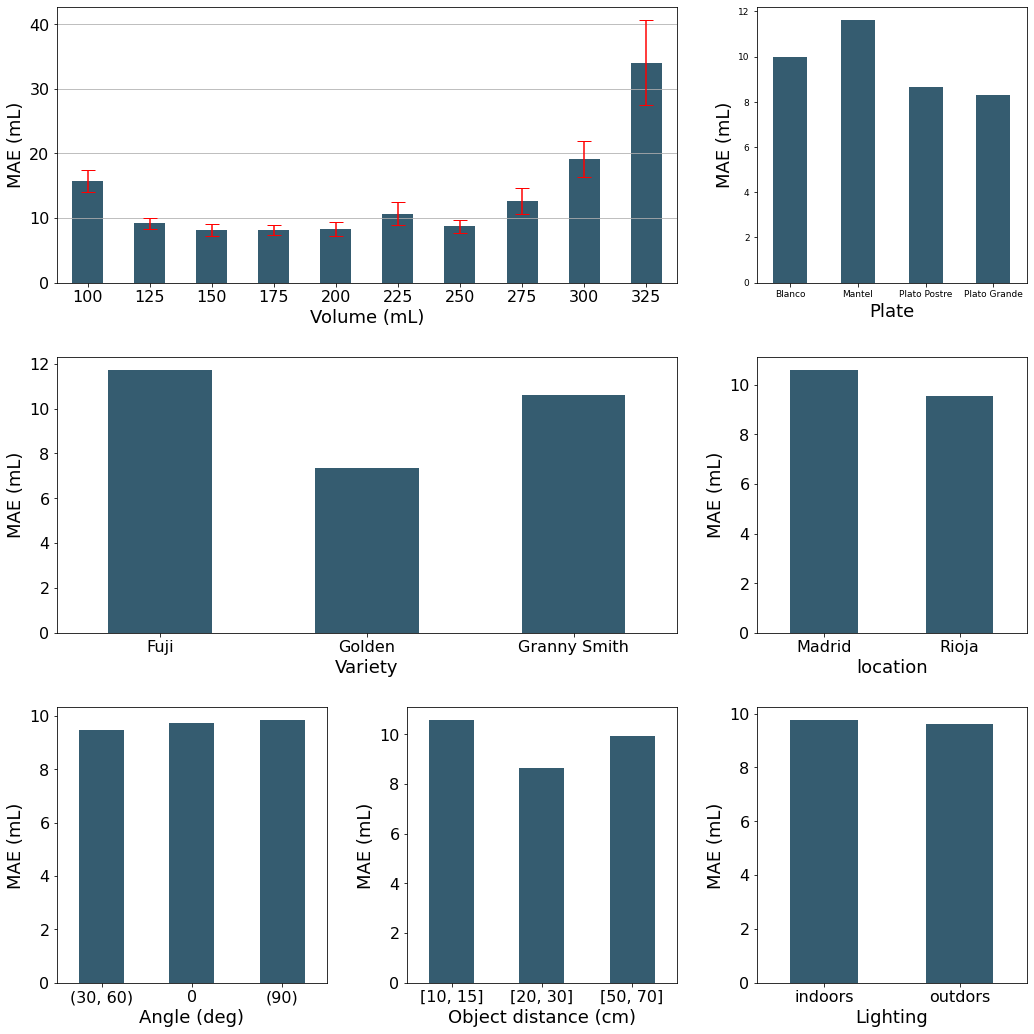

In [317]:
figsize = 5

fig, axs = plt.subplots(3, 3, figsize=(figsize*3, figsize*3))

gs = axs[0, 0].get_gridspec()
# remove the underlying axes
for ax in axs[0, 0:-1]:
    ax.remove()
axbig = fig.add_subplot(gs[0, 0:-1])


y_error = df_size['abs_error']* (df_size['std']/100) #TODO Preguntar esta bien std/100??
y_error = y_error.set_axis(df_size['size'])

df_size.plot.bar(x='size', y='abs_error', yerr=y_error, ax=axbig, color=['#355c70'], ecolor='r', capsize=7, legend=None)
axbig.set_xlabel('Volume (mL)', fontsize=18)
axbig.set_ylabel('MAE (mL)', fontsize=18)
axbig.tick_params(axis='x', rotation=0)
axbig.tick_params(axis='both', which='major', labelsize=16)
axbig.yaxis.grid(True)

df_plate.plot.bar(x='plate', y='abs_error', ax=axs[0,2], color=['#355c70'], legend=None)
axs[0,2].set_xlabel('Plate', fontsize=18)
axs[0,2].set_ylabel('MAE (mL)', fontsize=18)
axs[0,2].tick_params(axis='x', rotation=0)
axs[0,2].tick_params(axis='both', which='major', labelsize=9)

gs = axs[1, 0].get_gridspec()
# remove the underlying axes
for ax in axs[1, 0:-1]:
    ax.remove()
axbig2 = fig.add_subplot(gs[1, 0:-1])

df_variety.plot.bar(x='variety', y='abs_error', ax=axbig2, color=['#355c70'], legend=None)
axbig2.set_xlabel('Variety', fontsize=18)
axbig2.set_ylabel('MAE (mL)', fontsize=18)
axbig2.tick_params(axis='x', rotation=0)
axbig2.tick_params(axis='both', which='major', labelsize=16)

df_location.plot.bar(x='location', y='abs_error', ax=axs[1,2], color=['#355c70'], legend=None)
axs[1,2].set_xlabel('location', fontsize=18)
axs[1,2].set_ylabel('MAE (mL)', fontsize=18)
axs[1,2].tick_params(axis='x', rotation=0)
axs[1,2].tick_params(axis='both', which='major', labelsize=16)

df_angle.plot.bar(x='angle', y='abs_error', ax=axs[2,0], color=['#355c70'], legend=None)
axs[2,0].set_xlabel('Angle (deg)', fontsize=18)
axs[2,0].set_ylabel('MAE (mL)', fontsize=18)
axs[2,0].tick_params(axis='x', rotation=0)
axs[2,0].tick_params(axis='both', which='major', labelsize=16)

df_shot.plot.bar(x='shot', y='abs_error', ax=axs[2,1], color=['#355c70'], legend=None)
axs[2,1].set_xlabel('Object distance (cm)', fontsize=18)
axs[2,1].set_ylabel('MAE (mL)', fontsize=18)
axs[2,1].tick_params(axis='x', rotation=0)
axs[2,1].tick_params(axis='both', which='major', labelsize=16)

df_light.plot.bar(x='light', y='abs_error', ax=axs[2,2], color=['#355c70'], legend=None)
axs[2,2].set_xlabel('Lighting', fontsize=18)
axs[2,2].set_ylabel('MAE (mL)', fontsize=18)
labels = [item.get_text() for item in axs[2,2].get_xticklabels()]
labels[0] = 'indoors'
labels[1] = 'outdors'
axs[2,2].set_xticklabels(labels)
axs[2,2].tick_params(axis='x', rotation=0)
axs[2,2].tick_params(axis='both', which='major', labelsize=16)

# for ax in axs:
#    ax.tick_params(axis='both', which='major', labelsize=16)
    
fig.tight_layout(pad=3.0)
plt.savefig('/srv/image-results/abs_error.pdf',bbox_inches='tight')